In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
def plot_svm_boundary(model, X, y):
    X = X.values
    y = y.values

    # Scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='coolwarm')

    # Get the current axis
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create a grid to evaluate the model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    # Decision function
    Z = model.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['-', '-', '-'])

    # Plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')

    plt.show()

# Call the function with your model, X, and y
# plot_svm_boundary(your_model, your_X_data, your_y_data)


In [4]:
df = pd.read_csv("mouse_viral_study.csv")

In [5]:
df.head

<bound method NDFrame.head of      Med_1_mL  Med_2_mL  Virus Present
0    6.508231  8.582531              0
1    4.126116  3.073459              1
2    6.427870  6.369758              0
3    3.672953  4.905215              1
4    1.580321  2.440562              1
..        ...       ...            ...
395  2.884122  3.271748              1
396  7.290855  9.488672              0
397  7.895325  8.272529              0
398  2.690592  2.674979              1
399  7.587821  9.473968              0

[400 rows x 3 columns]>

In [6]:
df.columns

Index(['Med_1_mL', 'Med_2_mL', 'Virus Present'], dtype='object')

<Axes: xlabel='Med_1_mL', ylabel='Med_2_mL'>

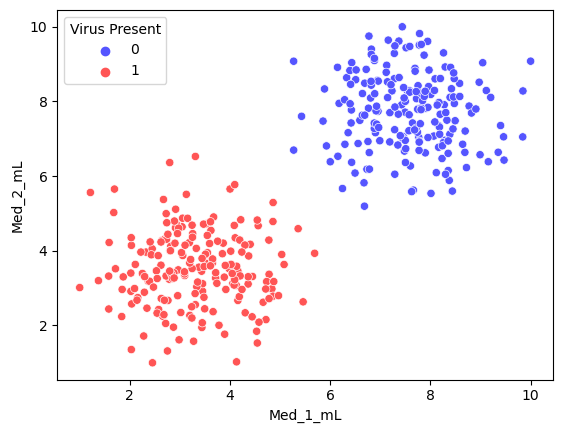

In [7]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL', hue='Virus Present',
               data=df, palette='seismic')

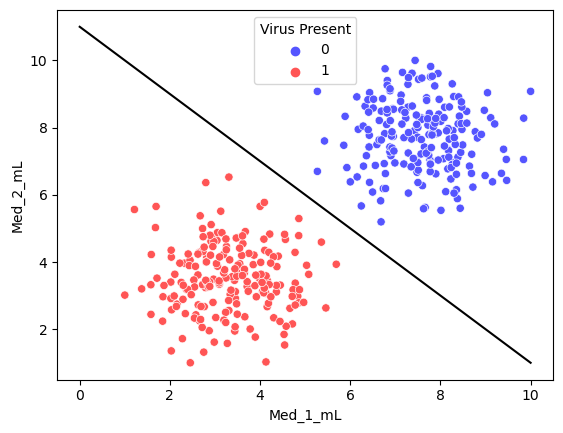

In [8]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL', hue='Virus Present',
               data=df, palette='seismic')

x = np.linspace(0,10,100)
m = -1
b = 11
y = m*x+b
plt.plot(x,y,'k')

In [10]:
from sklearn.svm import SVC

In [11]:
y = df['Virus Present']
X = df.drop('Virus Present', axis=1)

In [12]:
model = SVC(kernel='linear', C=1000)
model.fit (X,y)

SVC(C=1000, kernel='linear')

C:\Users\Zen\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


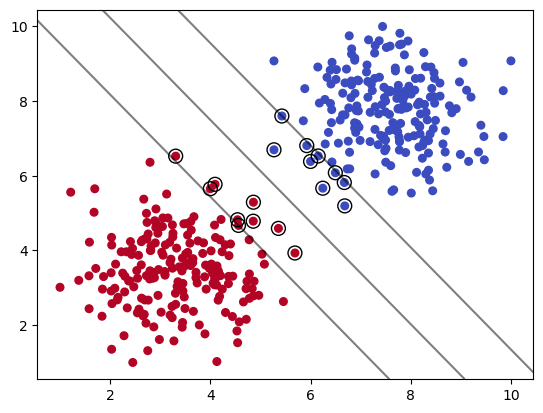

In [23]:
plot_svm_boundary(model, X, y)

It states that there is no module named svm_margin_plot

In [14]:
model = SVC(kernel='linear', C=0.05)
model.fit (X,y)

SVC(C=0.05, kernel='linear')

C:\Users\Zen\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


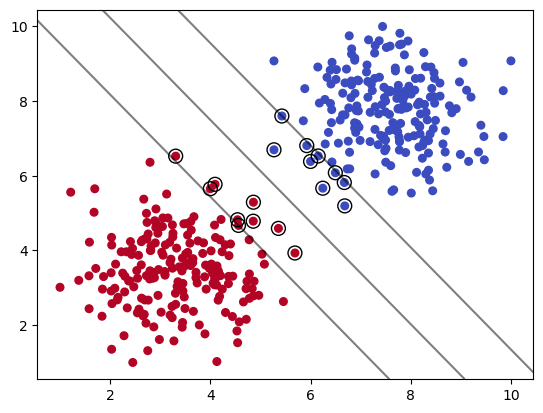

In [24]:
plot_svm_boundary(model,X,y)

C:\Users\Zen\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


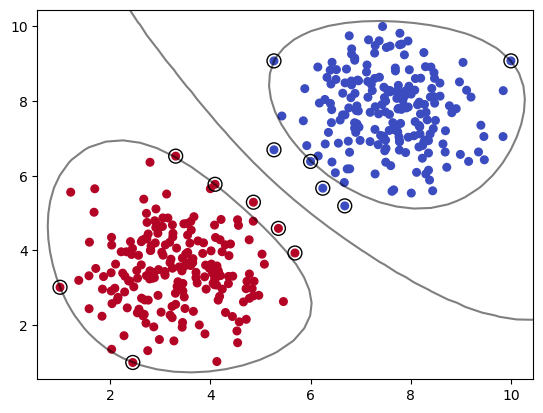

In [25]:
model= SVC(kernel='rbf', C=1)
model.fit(X, y)
plot_svm_boundary(model,X,y)

C:\Users\Zen\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


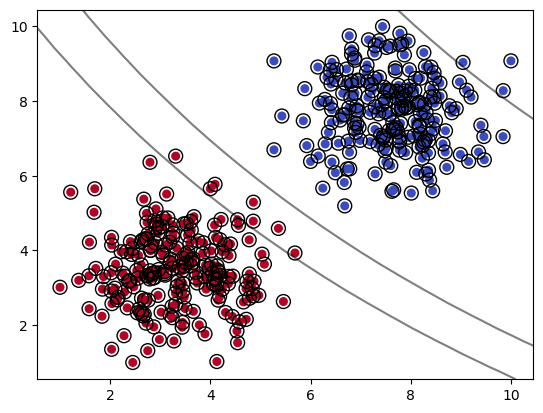

In [26]:
model = SVC(kernel='sigmoid')
model.fit(X,y)
plot_svm_boundary(model,X,y)                

C:\Users\Zen\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


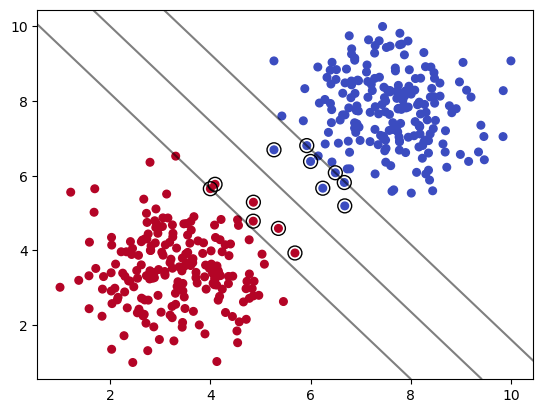

In [27]:
model = SVC(kernel='poly', C=1,degree=1)
model.fit(X,y)
plot_svm_boundary(model,X,y)

C:\Users\Zen\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


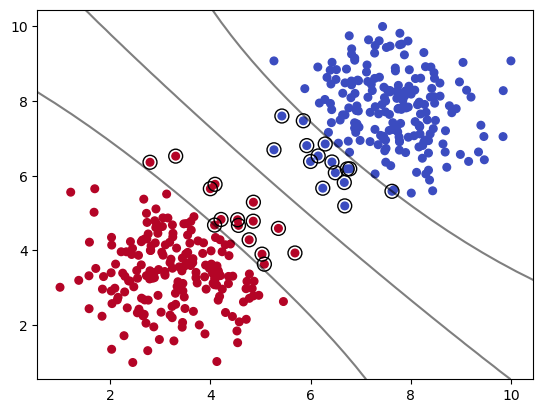

In [28]:
model = SVC(kernel='rbf', C=1,gamma=0.01)
model.fit(X,y)
plot_svm_boundary(model,X,y)

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
svm = SVC()
param_grid={'C':[0.01, 0.1, 1],'kernel':['linear','rbf']}
grid = GridSearchCV(svm,param_grid)

In [31]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [32]:
grid.best_score_

1.0

In [33]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}